<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [143]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [144]:
# Answer:
movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


#### Check the data type of each column.

In [145]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [146]:
# Answer:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [147]:
# Answer:
movies.duration.sort_values()

389     64
338     66
258     67
293     68
88      68
      ... 
445    220
142    224
78     229
157    238
476    242
Name: duration, Length: 979, dtype: int64

#### Create a histogram of duration, choosing an "appropriate" number of bins.

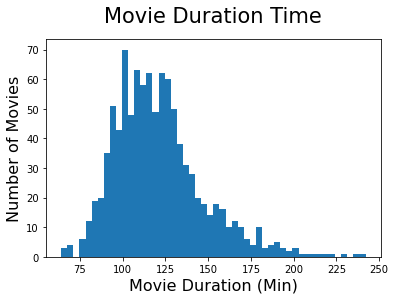

In [148]:
# Answer:
durplot = movies.duration.plot(kind = 'hist', bins = 50)
durplot.set_title('Movie Duration Time',
            fontsize = 21,
            y = 1.05,
            x= 0.5);

durplot.set_xlabel("Movie Duration (Min)",
             fontsize = 16)


# y-axis labels
durplot.set_ylabel('Number of Movies',
             fontsize = 16);

#### Use a box plot to display that same data.

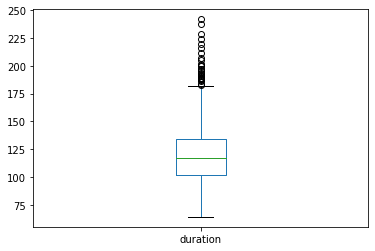

In [149]:
# Answer:
movies.duration.plot(kind = 'box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [150]:
# Answer:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

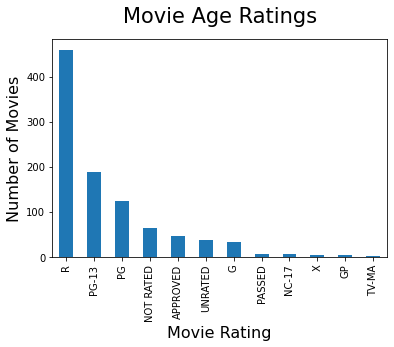

In [151]:
# Answer:
ratingplot = movies.content_rating.value_counts().plot(kind = 'bar')
ratingplot.set_title('Movie Age Ratings',
            fontsize = 21,
            y = 1.05,
            x= 0.5);

ratingplot.set_xlabel("Movie Rating",
             fontsize = 16)


# y-axis labels
ratingplot.set_ylabel('Number of Movies',
             fontsize = 16);

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [152]:
# Answer:
movies.content_rating = movies.content_rating.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], ['UNRATED', 'UNRATED', 'UNRATED', 'UNRATED'])
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [153]:
# Answer:
movies.content_rating = movies.content_rating.replace(['X', 'TV-MA'], ['NC-17', 'NC-17'])
movies.content_rating.value_counts()


R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

In [154]:
mask = movies.duration >=120
movies[mask]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
967,7.4,The Rock,R,Action,136,"[u'Sean Connery', u'Nicolas Cage', u'Ed Harris']"
968,7.4,The English Patient,R,Drama,162,"[u'Ralph Fiennes', u'Juliette Binoche', u'Will..."
973,7.4,The Cider House Rules,PG-13,Drama,126,"[u'Tobey Maguire', u'Charlize Theron', u'Micha..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."


#### Count the number of missing values in each column.

In [155]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [156]:
# Answer:

movies['content_rating'].loc[movies.content_rating.isnull()] = 'UNRATED'
#when I didn't have the movies['content_rating'], it changed some of the duration values to UNRATED and changed its dtype.
#I dont know why it did that, so I specified it as the column

C:\Users\huda1\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [157]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

In [158]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [159]:
movies.content_rating.value_counts() #unrated went up by 3 as expected

R          460
PG-13      189
UNRATED    163
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [160]:
movies.dtypes 

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [161]:
longmask = movies.duration >=120
longrating = movies[longmask].star_rating.mean()
shortmask = movies.duration < 120
shortrating = movies[shortmask].star_rating.mean()

print('long movie average star rating is {} and short movie average star rating is {}'.format(longrating, shortrating))

long movie average star rating is 7.948898678414082 and short movie average star rating is 7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

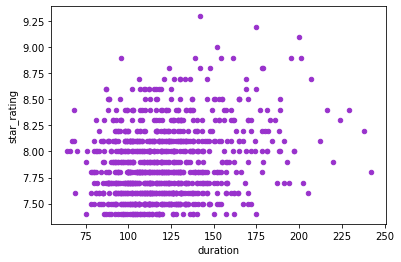

In [162]:
# Answer:
movies.plot(x='duration',
       y='star_rating',
       kind = 'scatter',
       color = 'darkorchid');
#no relationship

#### Calculate the average duration for each genre.

In [163]:
# Answer:
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

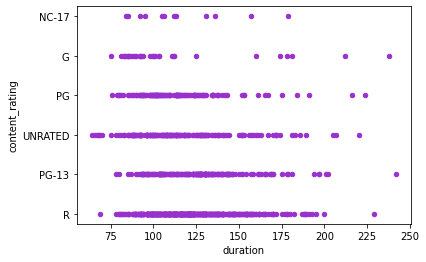

In [164]:
# Answer:
movies.plot(x='duration',
       y='content_rating',
       kind = 'scatter',
       color = 'darkorchid');

#### Determine the top rated movie (by star rating) for each genre.

In [177]:
# Answer:

movies.sort_values(['genre','star_rating','title'], ascending = [True, False, True])




,star_rating,title,content_rating,genre,duration,actors_list
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
19,8.7,Star Wars,PG,Action,121,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
20,8.7,The Matrix,R,Action,136,"[u'Keanu Reeves', u'Laurence Fishburne', u'Car..."
...,...,...,...,...,...,...
119,8.3,Unforgiven,R,Western,131,"[u'Clint Eastwood', u'Gene Hackman', u'Morgan ..."
236,8.1,High Noon,PG,Western,85,"[u'Gary Cooper', u'Grace Kelly', u'Thomas Mitc..."
263,8.1,Rio Bravo,UNRATED,Western,141,"[u'John Wayne', u'Dean Martin', u'Ricky Nelson']"
421,7.9,The Outlaw Josey Wales,PG,Western,135,"[u'Clint Eastwood', u'Sondra Locke', u'Chief D..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [183]:
# Answer:
movies[movies.title.duplicated()]

,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [185]:
movies[movies.duplicated()] #they are not actually duplicated

,star_rating,title,content_rating,genre,duration,actors_list


In [217]:
movies.loc[movies.title=='Dracula'] #different actors

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."


In [218]:
movies.loc[movies.title=='Les Miserables']

,star_rating,title,content_rating,genre,duration,actors_list
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."


In [109]:
movies.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [353]:
#create list
# Answer:
#manually create the list, filter my genre, then get the average

#relgenres = []
#movies.groupby('genre').apply(lambda x: x>10)
#count()#.loc[title]

'''grouped = movies.groupby('genre')
def genrelist(grouped):
    genrelist = []
    grouped= grouped.count()
    if grouped.title >= 10:
        print('greater than 10')
        genrelist.append('genre')
    #return genrelist
    return grouped

grouped.apply(genrelist, axis = 1)'''
        
#grouped= movies.groupby('genre').count()
#grouped.apply(lambda x: relgenres.append(x.genre) if x.title > 10, axis = 1)
#grouped.apply(lambda x: x.title>10, axis = 1)

#movies.groupby('genre').count().title.reset_index().filter(lambda x: x>10, axis=1)
#.set_index(['title'])
#


#.reset_index().set_index(['title'])
#newlist = movies.groupby('genre').count().title.reset_index().set_index(['title'])
#if newlist.index > 10:
#    print('works')
#else:
#    print('no')

#movies[mask]
#df2[df2['score']> 3]

movies.genre.value_counts()
listmovies = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']
movies[movies.genre.isin(listmovies)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [357]:
# Answer:
genre_counts = movies.genre.value_counts()
mask = list(genre_counts[genre_counts>10].index)
mask

['Drama',
 'Comedy',
 'Action',
 'Crime',
 'Biography',
 'Adventure',
 'Animation',
 'Horror',
 'Mystery']

In [360]:
filtered = movies[movies.genre.isin(mask)].groupby('genre')
filtered

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [341]:
# Answer:
filtered.groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [344]:
# Answer:
aggfilt = filtered.groupby('genre').star_rating.agg(['count', 'mean'])
aggfilt.loc[aggfilt['count'] > 50]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518


## Context": Possible Data Problem You Could Address With This Data

#### Figure out something "interesting" using the actors data!

In [197]:
movies[movies.sort_values('star_rating', ascending = False).actors_list.duplicated()] 

#how come The Hobbit is in here but Lord of the Rings is not?

<ipython-input-197-e1ddf177c32d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movies[movies.sort_values('star_rating', ascending = False).actors_list.duplicated()]


,star_rating,title,content_rating,genre,duration,actors_list
19,8.7,Star Wars,PG,Action,121,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
80,8.4,Star Wars: Episode VI - Return of the Jedi,PG,Action,134,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
414,7.9,Toy Story 2,G,Animation,92,"[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']"
520,7.8,Back to the Future Part II,PG,Adventure,108,"[u'Michael J. Fox', u'Christopher Lloyd', u'Le..."
551,7.8,Harry Potter and the Prisoner of Azkaban,PG,Adventure,142,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
642,7.7,Harry Potter and the Deathly Hallows: Part 1,PG-13,Adventure,146,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
727,7.6,Harry Potter and the Goblet of Fire,PG-13,Adventure,157,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
814,7.6,The Hobbit: The Battle of the Five Armies,PG-13,Adventure,144,"[u'Ian McKellen', u'Martin Freeman', u'Richard..."
891,7.5,Harry Potter and the Half-Blood Prince,PG,Adventure,153,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
932,7.4,Harry Potter and the Order of the Phoenix,PG-13,Adventure,138,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."


In [195]:
movies.actors_list.value_counts() #harry potter actors appear the most

[u'Daniel Radcliffe', u'Emma Watson', u'Rupert Grint']                 6
[u'Mark Hamill', u'Harrison Ford', u'Carrie Fisher']                   3
[u'Michael J. Fox', u'Christopher Lloyd', u'Lea Thompson']             2
[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']                           2
[u'Ian McKellen', u'Martin Freeman', u'Richard Armitage']              2
                                                                      ..
[u'L\xe9a Seydoux', u'Ad\xe8le Exarchopoulos', u'Salim Kechiouche']    1
[u'Tom Cruise', u'Jason Robards', u'Julianne Moore']                   1
[u'Sylvester Stallone', u'Brian Dennehy', u'Richard Crenna']           1
[u'Jennifer Connelly', u'Ben Kingsley', u'Ron Eldard']                 1
[u'Arnold Schwarzenegger', u'Linda Hamilton', u'Edward Furlong']       1
Name: actors_list, Length: 969, dtype: int64